In [1]:
# https://www.ecdc.europa.eu/en/publications-data/data-national-14-day-notification-rate-covid-19

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import matplotlib.pyplot as plt

from tensorflow import keras

In [4]:
df = pd.read_excel ('data.xlsx')

In [5]:
np.set_printoptions(precision=3, suppress=True)

In [6]:
df.isna().sum()

country                0
country_code        1020
continent              0
population             0
indicator              0
weekly_count           0
year_week              0
rate_14_day          440
cumulative_count       0
source                 0
dtype: int64

In [7]:
df[df.isna().any(axis=1)]

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
0,Afghanistan,AFG,Asia,38928341,cases,0,2020-01,NaN,0,"Epidemic intelligence, national weekly data"
85,Afghanistan,AFG,Asia,38928341,deaths,0,2020-01,NaN,0,"Epidemic intelligence, national weekly data"
170,Africa (total),NaN,Africa,352325033,cases,0,2020-01,NaN,0,"Epidemic intelligence, national weekly data"
171,Africa (total),NaN,Africa,352325033,cases,0,2020-02,0.0,0,"Epidemic intelligence, national weekly data"
172,Africa (total),NaN,Africa,352325033,cases,0,2020-03,0.0,0,"Epidemic intelligence, national weekly data"
...,...,...,...,...,...,...,...,...,...,...
33485,Yemen,YEM,Asia,29825968,deaths,0,2020-15,NaN,0,"Epidemic intelligence, national weekly data"
33556,Zambia,ZMB,Africa,18383956,cases,3,2020-12,NaN,3,"Epidemic intelligence, national weekly data"
33630,Zambia,ZMB,Africa,18383956,deaths,0,2020-12,NaN,0,"Epidemic intelligence, national weekly data"
33704,Zimbabwe,ZWE,Africa,14862927,cases,2,2020-12,NaN,2,"Epidemic intelligence, national weekly data"


In [8]:
df[df.country_code.isna()]

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
170,Africa (total),NaN,Africa,352325033,cases,0,2020-01,NaN,0,"Epidemic intelligence, national weekly data"
171,Africa (total),NaN,Africa,352325033,cases,0,2020-02,0.000000,0,"Epidemic intelligence, national weekly data"
172,Africa (total),NaN,Africa,352325033,cases,0,2020-03,0.000000,0,"Epidemic intelligence, national weekly data"
173,Africa (total),NaN,Africa,352325033,cases,0,2020-04,0.000000,0,"Epidemic intelligence, national weekly data"
174,Africa (total),NaN,Africa,352325033,cases,0,2020-05,0.000000,0,"Epidemic intelligence, national weekly data"
...,...,...,...,...,...,...,...,...,...,...
23693,Oceania (total),NaN,Oceania,42137809,deaths,68,2021-28,2.301971,1536,"Epidemic intelligence, national weekly data"
23694,Oceania (total),NaN,Oceania,42137809,deaths,58,2021-29,2.990189,1594,"Epidemic intelligence, national weekly data"
23695,Oceania (total),NaN,Oceania,42137809,deaths,95,2021-30,3.630943,1689,"Epidemic intelligence, national weekly data"
23696,Oceania (total),NaN,Oceania,42137809,deaths,74,2021-31,4.010650,1763,"Epidemic intelligence, national weekly data"


In [9]:
df.drop(df[df.country_code.isna()].index, inplace = True)

In [18]:
df

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
0,Afghanistan,AFG,Asia,38928341,cases,0,2020-01,NaN,0,"Epidemic intelligence, national weekly data"
1,Afghanistan,AFG,Asia,38928341,cases,0,2020-02,0.000000,0,"Epidemic intelligence, national weekly data"
2,Afghanistan,AFG,Asia,38928341,cases,0,2020-03,0.000000,0,"Epidemic intelligence, national weekly data"
3,Afghanistan,AFG,Asia,38928341,cases,0,2020-04,0.000000,0,"Epidemic intelligence, national weekly data"
4,Afghanistan,AFG,Asia,38928341,cases,0,2020-05,0.000000,0,"Epidemic intelligence, national weekly data"
...,...,...,...,...,...,...,...,...,...,...
33847,Zimbabwe,ZWE,Africa,14862927,deaths,437,2021-28,50.057435,2622,"Epidemic intelligence, national weekly data"
33848,Zimbabwe,ZWE,Africa,14862927,deaths,472,2021-29,61.158882,3094,"Epidemic intelligence, national weekly data"
33849,Zimbabwe,ZWE,Africa,14862927,deaths,489,2021-30,64.657520,3583,"Epidemic intelligence, national weekly data"
33850,Zimbabwe,ZWE,Africa,14862927,deaths,317,2021-31,54.228888,3900,"Epidemic intelligence, national weekly data"


In [19]:
df_cases = df[df.indicator == 'cases']
df_deaths = df[df.indicator == 'deaths']

In [20]:
df_merged = pd.merge(df_cases, df_deaths, how = 'inner', \
         on = ['country', 'country_code', 'continent', 'population', 'year_week', 'source'])

In [24]:
df = df_merged[['weekly_count_x', 'weekly_count_y']]

In [25]:
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

In [26]:
train_features

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
32051,United Republic Of Tanzania,TZA,Africa,59734213,cases,0,2020-39,0.000000,509,"Epidemic intelligence, national weekly data"
24474,Papua New Guinea,PNG,Oceania,8947027,deaths,8,2021-21,2.905993,162,"Epidemic intelligence, national weekly data"
11576,France,FRA,Europe,67320216,cases,8503,2020-31,22.476161,187696,"Epidemic intelligence, national weekly data"
22501,New Zealand,NZL,Oceania,4822233,deaths,0,2020-09,0.000000,0,"Epidemic intelligence, national weekly data"
1873,Aruba,ABW,America,106766,deaths,2,2021-14,93.662777,92,"Epidemic intelligence, national weekly data"
...,...,...,...,...,...,...,...,...,...,...
5322,Bulgaria,BGR,Europe,6951482,deaths,20,2021-29,7.768128,18194,"Epidemic intelligence, national weekly data"
30089,Taiwan,TWN,Asia,23816775,cases,4189,2021-21,27.266496,8511,"Epidemic intelligence, national weekly data"
21332,Morocco,MAR,Africa,36910558,cases,1210,2020-17,6.513042,4065,"Epidemic intelligence, national weekly data"
18270,Liberia,LBR,Africa,5057677,cases,30,2020-32,1.482894,1237,"Epidemic intelligence, national weekly data"


In [27]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('weekly_count_y')
test_labels = test_features.pop('weekly_count_y')

In [28]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [29]:
normalizer = preprocessing.Normalization(input_shape = [1, ], axis = None)

In [31]:
normalizer.adapt(np.array(train_features))

In [35]:
dnn_model = build_and_compile_model(normalizer)

In [36]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [40]:
%%time
history = dnn_model.fit(
    train_features['weekly_count_x'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 22.8 s, sys: 10.4 s, total: 33.2 s
Wall time: 16.1 s


In [42]:
x = tf.linspace(0.0, 3500000, 100000)
y = dnn_model.predict(x)

In [43]:
def plot_deaths(x, y):
  plt.scatter(train_features['weekly_count_x'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Cases')
  plt.ylabel('Deaths')
  plt.legend()

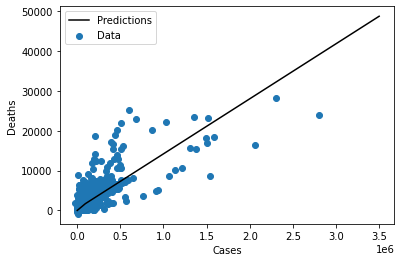

In [45]:
plot_deaths(x, y)

In [48]:
test_results = {}

test_results['dnn_model'] = dnn_model.evaluate(
    test_features['weekly_count_x'],
    test_labels, verbose=0)

In [50]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
dnn_model,152.337997


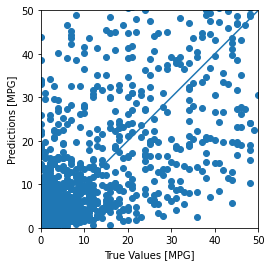

In [58]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

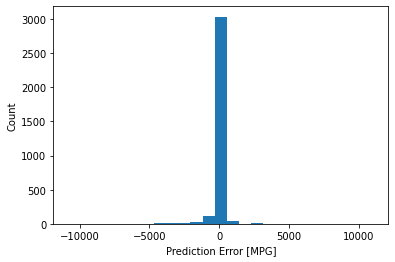

In [52]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [53]:
# dnn_model.save('dnn_model')

In [ ]:
# reloaded = tf.keras.models.load_model('dnn_model')

# test_results['reloaded'] = reloaded.evaluate(
#     test_features, test_labels, verbose=0)